# Example 4: Hyperparameter Tuning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [2]:
np.random.seed(1337)
np.set_printoptions(3)

In [3]:
def train_val_test_split(x, t):
    x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.2)
    x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.2)
    return (
        x_train, t_train,
        x_val, t_val, 
        x_test, t_test,
    )

## Generate toy data

In [5]:
# configurations
n_samples = 100
w_true = np.array([1.5])
b_true = 0.5
noise_scale = 1.0

# Generate input features
n_features = len(w_true)
x = np.random.randn(n_samples, n_features)

# Generate target values with noise
noise = np.random.randn(n_samples) * noise_scale
t = (x * w_true).sum(axis=1) + b_true + noise

x_train, t_train, x_val, t_val, x_test, t_test = train_val_test_split(x, t)

# Training models with different learning rates

In [6]:
# leraning rate
eta0_list = [0.1, 0.01, 0.001]

# models with different hyperparameters
model_list = []

# MSE determined from the validation set

mse_val_list = []
for eta0 in eta0_list:
    print(f'{eta0}', end='')
    
    model = SGDRegressor(eta0=eta0)
    model.fit(x_train, t_train)
    y_val = model.predict(x_val)
    mse_val = mean_squared_error(y_true=t_val, y_pred=y_val)
    
    print(f' -> {mse_val=:.3f}')

    model_list.append(model)
    mse_val_list.append(mse_val)
    

0.1 -> mse_val=0.574
0.01 -> mse_val=0.567
0.001 -> mse_val=0.624


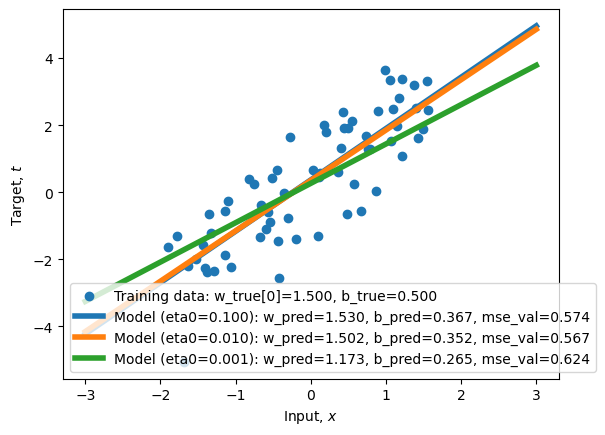

In [8]:
x_vis = np.linspace(-3, 3).reshape(-1, 1)

y_vis_list = [model.predict(x_vis) for model in model_list]

fig, ax = plt.subplots()
ax.scatter(x_train, t_train, label=f'Training data: {w_true[0]=:.3f}, {b_true=:.3f}')

for eta0, model, y_vis, mse_val in zip(eta0_list, model_list, y_vis_list, mse_val_list):
    w_pred = model.coef_[0]
    b_pred = model.intercept_[0]
    label = f'Model ({eta0=:.3f}): {w_pred=:.3f}, {b_pred=:.3f}, {mse_val=:.3f}'
    ax.plot(x_vis, y_vis, label=label, linewidth=4)
    
ax.set_xlabel(r"Input, $x$")
ax.set_ylabel(r"Target, $t$")
ax.legend()

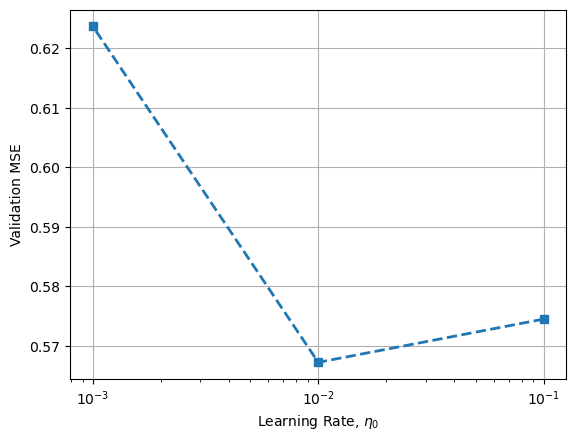

In [19]:
fig, ax = plt.subplots()
ax.plot(eta0_list, mse_val_list, marker='s', ls='--', lw=2)
ax.set_xlabel(r'Learning Rate, $\eta_{0}$')
ax.set_ylabel(r'Validation MSE')
ax.grid()
ax.set_xscale('log')

In [20]:
best_model_idx = np.argmin(mse_val_list)

best_model = model_list[best_model_idx]

y_test = best_model.predict(x_test)

mse_test = mean_squared_error(t_test, y_test)
print(f'{mse_test}')

0.536000905558416
